In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import minimize

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import add_beam, add_scalebar
import astropy.units as u
import pickle

# following imports needed for EMCEE fits
import emcee
import corner
import os
from IPython.display import display, Math

plt.rcParams.update({"text.usetex": True,
                     "font.family": "serif",
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.major.size': 6,
                     'ytick.major.size': 6,
                     'xtick.minor.size': 3,
                     'ytick.minor.size': 3})


In [2]:
from config import *

## Regions to be used
Lets show the integrated intensity maps of the regions.

In [3]:
my_figsize = (6, 4)
file_list_TdV = [file_TdV_13co,
                 file_TdV_c18o,
                 file_TdV_h13cop,
                 file_TdV_hnc]
col_pos = [0.68, 0.25, 0.225, 0.025]

y_offset = 0.02
xpos_lab1, ypos_lab1 = (0.05, 0.9 + y_offset)
xpos_lab2, ypos_lab2 = (0.05, 0.85 + y_offset)
xpos_lab3, ypos_lab3 = (0.075, 0.875 + y_offset)

In [4]:
def plot_setup_ngc1333_wcsaxes(ax, hdu, label_col='black', telescope='NOEMA'):
    if telescope == 'FCRAO':
        format_xaxis = 'hh:mm'
        scalebar_length = 1 * u.pc
        scalebar_text="1 pc"
        tick_minor_x = 4
        tick_minor_y = 3
        scalebar_pos_dy = 3*u.arcmin
    elif telescope == 'JCMT':
        format_xaxis = 'hh:mm:ss'
        scalebar_length = 0.2 * u.pc
        scalebar_text="0.2 pc"
        tick_minor_x = 5
        tick_minor_y = 5
        scalebar_pos_dy = 0.75*u.arcmin 
    else:
        format_xaxis = 'hh:mm:ss'
        scalebar_length = 10e3*u.au
        scalebar_text="10,000 au"
        tick_minor_x = 4
        tick_minor_y = 4
        scalebar_pos_dy = 0.004*u.deg
    # ticks
    ra_ax = ax.coords[0] # lon
    dec_ax = ax.coords[1] # lat
    ra_ax.set_major_formatter(format_xaxis)
    dec_ax.set_major_formatter('dd:mm')
    ra_ax.display_minor_ticks(True)
    dec_ax.display_minor_ticks(True)
    ra_ax.set_minor_frequency(tick_minor_x)
    dec_ax.set_minor_frequency(tick_minor_y)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3)
    ax.autoscale(enable=False)
    
    # Add beamsize
    add_beam(ax, header=hdu.header, frame=False, pad=0.5, 
             color=label_col, corner='top right')
    # Scalebar
    length = ( scalebar_length/ (distance)).to(u.deg, u.dimensionless_angles())
    add_scalebar(ax, length, label=scalebar_text, color=label_col, corner='bottom right')

    #
    ax.set_xlabel(r'Right Ascension (J2000)')
    ax.set_ylabel(r'Declination (J2000)')
    return #fig_i

def plot_footprint(ax, file_in, color='k'):
    """
    it overplots the footprint of the given file on an already displayed image.
    The image needs to use the astropy wcs coordinate axis.

    color: color of footprint lines. Default is black.
    """
    hd = fits.getheader(file_in)
    wcs = WCS(hd)
    x = np.array([0, 1, 1, 0, 0]) * hd['NAXIS1']
    y = np.array([0, 0, 1, 1, 0]) * hd['NAXIS2']
    ra, dec = wcs.wcs_pix2world(x, y, 0)
    ax.plot(ra, dec, color='white', transform=ax.get_transform('fk5'), linestyle="--", linewidth=1)
    ax.plot(ra, dec, color=color, transform=ax.get_transform('fk5'), linestyle="--", linewidth=0.7)

    return

Set OBSGEO-B to    19.825833 from OBSGEO-[XYZ].
Set OBSGEO-H to       -3.003 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


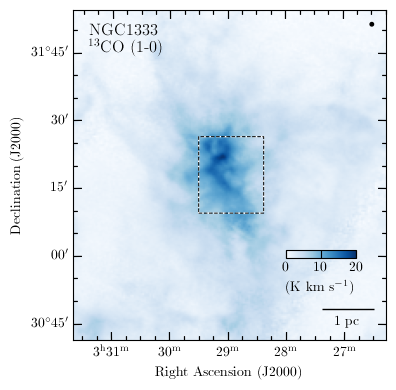

In [5]:
text_color = 'black'

hdu = fits.open(file_TdV_13co)[0]
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin=0.0, vmax=20.0, cmap=cmap, origin='lower')
ax.invert_xaxis()
ax.invert_yaxis()

plot_setup_ngc1333_wcsaxes(ax, hdu, label_col=text_color, telescope='FCRAO')

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(K km s$^{-1}$)', 
                    orientation='horizontal')
cbar.set_ticks([0, 10, 20])

fig.text(xpos_lab1, ypos_lab1, 'NGC1333', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'$^{13}$CO (1-0)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

plot_footprint(ax, file_list_TdV[1], color='k')
plt.tight_layout()
fig.savefig('figs/NGC1333_13CO_TdV.pdf', dpi=200, bbox_inches='tight')

Set OBSGEO-B to    19.825833 from OBSGEO-[XYZ].
Set OBSGEO-H to       -3.003 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


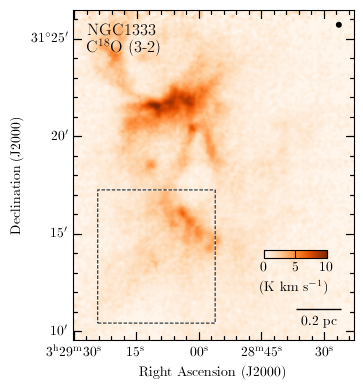

In [6]:
text_color = 'black'

hdu = fits.open(file_TdV_c18o)[0]
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Oranges').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin=0.0, vmax=10, cmap=cmap, origin='lower')

plot_setup_ngc1333_wcsaxes(ax, hdu, label_col=text_color, telescope='JCMT')

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(K km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 5, 10])

fig.text(xpos_lab1, ypos_lab1, 'NGC1333', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'C$^{18}$O (3-2)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plot_footprint(ax, file_list_TdV[2], color='k')
plt.tight_layout()
fig.savefig('figs/NGC1333_C18O_TdV.pdf', dpi=200, bbox_inches='tight')

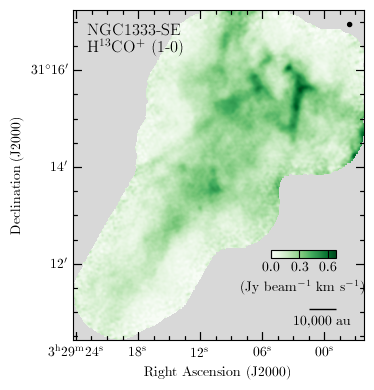

In [7]:
text_color = 'black'

hdu = fits.open(file_TdV_h13cop)[0]
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Greens').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin=0.0, cmap=cmap, origin='lower')

plot_setup_ngc1333_wcsaxes(ax, hdu, label_col=text_color, telescope='NOEMA')

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 0.3, 0.6])

fig.text(xpos_lab1, ypos_lab1, 'NGC1333-SE', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'H$^{13}$CO$^+$ (1-0)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
fig.savefig('figs/NGC1333_H13COp_TdV.pdf', dpi=200, bbox_inches='tight')

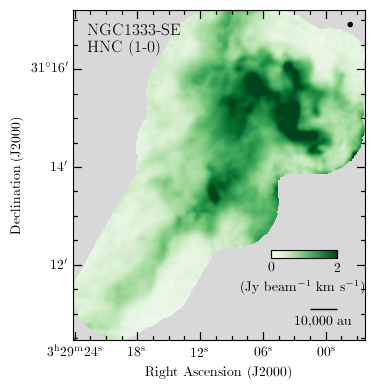

In [8]:
text_color = 'black'

hdu = fits.open(file_TdV_hnc)[0]
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Greens').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin=0, vmax=2, cmap=cmap, origin='lower')

plot_setup_ngc1333_wcsaxes(ax, hdu, label_col=text_color, telescope='NOEMA')

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
# cbar.set_ticks([0, 0.1, 0.2, 0.3])

fig.text(xpos_lab1, ypos_lab1, 'NGC1333-SE', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'HNC (1-0)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
fig.savefig('figs/NGC1333_HNC_TdV.pdf', dpi=200, bbox_inches='tight')

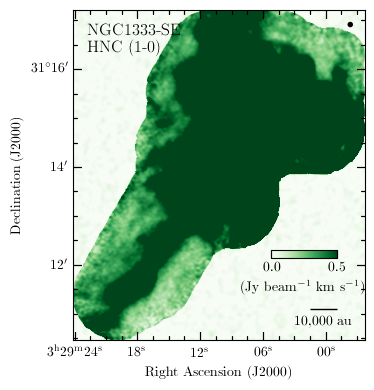

In [9]:
text_color = 'black'

hdu = fits.open(file_TdV_hnc_pad)[0]
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Greens').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin=0, vmax=0.5, cmap=cmap, origin='lower')

plot_setup_ngc1333_wcsaxes(ax, hdu, label_col=text_color, telescope='NOEMA')

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
# cbar.set_ticks([0, 0.1, 0.2, 0.3])

fig.text(xpos_lab1, ypos_lab1, 'NGC1333-SE', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'HNC (1-0)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
# fig.savefig('figs/NGC1333_HNC_TdV.pdf', dpi=200, bbox_inches='tight')

### Power Spectrum of Intensity

In [10]:
file_pickle_13co = 'data/powerspec_NGC1333_13CO_1-0_TdV.pickle'
file_pickle_13co_apod = 'data/powerspec_NGC1333_13CO_1-0_TdV_apod.pickle'
file_pickle_c18o = 'data/powerspec_NGC1333_SE_C18O_TdV.pickle'
file_pickle_c18o_apod = 'data/powerspec_NGC1333_SE_C18O-TdV_apod.pickle'
file_pickle_h13cop_pad = 'data/powerspec_NGC1333_H13COp_L17-merged_fix_pad_TdV.pickle'
file_pickle_h13cop = 'data/powerspec_NGC1333_H13COp_L17-merged_fix_TdV.pickle'
file_pickle_hnc_pad = 'data/powerspec_NGC1333_HNC_L23-merged_fix_pad_TdV.pickle'
file_pickle_hnc = 'data/powerspec_NGC1333_HNC_L23-merged_fix_TdV.pickle'

In [11]:
# pspec_13co_TdV
pspec_13co_TdV = pickle.load(open(file_pickle_13co, "rb" ))
pspec_13co_TdV_apod = pickle.load(open(file_pickle_13co_apod, "rb" ))

pspec_c18o_TdV = pickle.load(open(file_pickle_c18o, "rb" ))
pspec_c18o_TdV_apod = pickle.load(open(file_pickle_c18o_apod, "rb" ))

pspec_h13cop_TdV = pickle.load(open(file_pickle_h13cop, "rb" ))
pspec_h13cop_TdV_pad = pickle.load(open(file_pickle_h13cop_pad, "rb" ))

pspec_hnc_TdV = pickle.load(open(file_pickle_hnc, "rb" ))
pspec_hnc_TdV_pad = pickle.load(open(file_pickle_hnc_pad, "rb" ))

### Conversion of pixel units to pc

In [12]:
conv_13co = np.abs((pspec_13co_TdV_apod.header['CDELT1'] * u.deg.to('', equivalencies=u.dimensionless_angles()))*distance).to(u.pc)
conv_c18o = np.abs((pspec_c18o_TdV_apod.header['CDELT1'] * u.deg.to('', equivalencies=u.dimensionless_angles()))*distance).to(u.pc)
conv_h13cop = np.abs((pspec_h13cop_TdV.header['CDELT1'] * u.deg.to('', equivalencies=u.dimensionless_angles()))*distance).to(u.pc)
conv_hnc = np.abs((pspec_hnc_TdV.header['CDELT1'] * u.deg.to('', equivalencies=u.dimensionless_angles()))*distance).to(u.pc)

In [13]:
beam_multiple = 3.0
gd_13co_TdV = (pspec_13co_TdV_apod.freqs.value < np.abs(pspec_13co_TdV_apod.header['CDELT1']) / pspec_13co_TdV_apod.header['BMAJ'] / beam_multiple)
gd_c18o_TdV = (pspec_c18o_TdV_apod.freqs.value < np.abs(pspec_c18o_TdV_apod.header['CDELT1']) / pspec_c18o_TdV_apod.header['BMAJ'] / beam_multiple)

gd_h13cop_TdV = (pspec_h13cop_TdV.freqs.value < np.abs(pspec_h13cop_TdV.header['CDELT1']) / pspec_h13cop_TdV.header['BMAJ'] / beam_multiple)
gd_hnc_TdV = (pspec_hnc_TdV.freqs.value < np.abs(pspec_hnc_TdV.header['CDELT1']) / pspec_hnc_TdV.header['BMAJ'] / beam_multiple)

The goal is to combine the power-spectrum from the different tracers using scaling parameters for $^{13}$CO and  C$^{18}$O, $f_{13}$ and $f_{18}$. The model can be written as:
\begin{equation}
P(k) = A k^{\beta}~,
\end{equation}
where the data for C$^{18}$O is used as anchor.

In [14]:
ln_log = np.log10(np.exp(1))

k_mhd_wave = (1. / 54e-3) # value from Pineda et al. (2023, CRIR)
log_k_mhd_wave = np.log10(k_mhd_wave)

# 13CO 1-0
# linear and log quantities
#
freq_13co_TdV = (pspec_13co_TdV_apod.freqs[gd_13co_TdV] / conv_13co).value
log_freq_13co_TdV = np.log10(freq_13co_TdV)
#
P_TdV_13co = pspec_13co_TdV_apod.ps1D[gd_13co_TdV] * 1e-7
log_P_TdV_13co = np.log10(P_TdV_13co)
eP_TdV_13co = pspec_13co_TdV_apod.ps1D_stddev[gd_13co_TdV] * 1e-7
elogP_TdV_13co = ln_log * eP_TdV_13co / P_TdV_13co


# C18O 3-2
# linear and log quantities
#
freq_c18o_TdV = (pspec_c18o_TdV_apod.freqs[gd_c18o_TdV] / conv_c18o).value
log_freq_c18o_TdV = np.log10(freq_c18o_TdV)
#
# Normalization for C18O (3-2)
#
idx = np.abs(log_freq_c18o_TdV - 0.49).argmin()
rescale = pspec_c18o_TdV_apod.ps1D[idx]
#
#
P_TdV_c18o = pspec_c18o_TdV_apod.ps1D[gd_c18o_TdV] / rescale #* 1e-7
#
log_P_TdV_c18o = np.log10(P_TdV_c18o)
eP_TdV_c18o = pspec_c18o_TdV_apod.ps1D_stddev[gd_c18o_TdV] * 1e-7
elogP_TdV_c18o = ln_log * eP_TdV_c18o / P_TdV_c18o

# H13CO+ 1-0
# linear and log quantities
#
freq_h13cop_TdV = (pspec_h13cop_TdV_pad.freqs[gd_h13cop_TdV] / conv_h13cop).value
log_freq_h13cop_TdV = np.log10(freq_h13cop_TdV)
#
P_TdV_h13cop = pspec_h13cop_TdV_pad.ps1D[gd_h13cop_TdV] * 1e-7
log_P_TdV_h13cop = np.log10(P_TdV_h13cop)
eP_TdV_h13cop = pspec_h13cop_TdV_pad.ps1D_stddev[gd_h13cop_TdV] * 1e-7
elogP_TdV_h13cop = ln_log * eP_TdV_h13cop / P_TdV_h13cop


# HNC 1-0
# linear and log quantities
#
freq_hnc_TdV = (pspec_hnc_TdV_pad.freqs[gd_hnc_TdV] / conv_hnc).value
log_freq_hnc_TdV = np.log10(freq_hnc_TdV)
#
P_TdV_hnc = pspec_hnc_TdV_pad.ps1D[gd_hnc_TdV] * 1e-7
log_P_TdV_hnc = np.log10(P_TdV_hnc)
eP_TdV_hnc = pspec_hnc_TdV_pad.ps1D_stddev[gd_hnc_TdV] * 1e-7
elogP_TdV_hnc = ln_log * eP_TdV_hnc / P_TdV_hnc


#
# Here we stitch all the frequencies together, but dropping the first
# frequency, since it is the most uncertain.
#
n_drop_f = 1

log_freq_all_hnc_TdV_f = np.append(log_freq_13co_TdV[n_drop_f:], 
                                 np.append(log_freq_c18o_TdV[n_drop_f:], 
                                           log_freq_hnc_TdV[n_drop_f:]))
log_freq_all_h13cop_TdV_f = np.append(log_freq_13co_TdV[n_drop_f:], 
                                    np.append(log_freq_c18o_TdV[n_drop_f:], 
                                              log_freq_h13cop_TdV[n_drop_f:]))

#
# Define functions for fitting. 
#
def power_law_spectrum(log_freq, A, beta):
    return A - log_freq * beta

def log_prior_TdV_HNC(theta):
    A, beta, f_13, f_hnc = theta
    if 1.0 < A < 2.5 and 2.0 < beta < 3.4 and 2.0 < f_13 < 3.0 and -2.0 < f_hnc < -1.0:
        return 0.0
    return -np.inf

def log_likelihood_log_TdV_HNC(theta):
    """ Likelihood function for working on log-log"""
    A, beta, f_13, f_hnc = theta
    model_all_hnc = power_law_spectrum(log_freq_all_hnc_TdV_f, A, beta)
    log_P_TdV_all_hnc = np.append(f_13 + log_P_TdV_13co[n_drop_f:], 
                                  np.append(log_P_TdV_c18o[n_drop_f:], 
                                            f_hnc + log_P_TdV_hnc[n_drop_f:])
                                 )
    sigma_all_hnc = np.append(elogP_TdV_13co[n_drop_f:], 
                              np.append(elogP_TdV_c18o[n_drop_f:], 
                                        elogP_TdV_hnc[n_drop_f:])
                             )
    return -0.5 * np.sum((log_P_TdV_all_hnc - model_all_hnc)**2 / sigma_all_hnc**2)

def log_probability_log_TdV_HNC(theta):
    lp = log_prior_TdV_HNC(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_log_TdV_HNC(theta)


def log_prior_TdV_H13COp(theta):
    A, beta, f_13, f_h13cop = theta
    if 1.0 < A < 2.5 and 2.40 < beta < 3.4 and 2.0 < f_13 < 3.0 and -1.0 < f_h13cop < 0.5:
        return 0.0
    return -np.inf

def log_likelihood_log_TdV_H13COp(theta):
    A, beta, f_13, f_h13cop = theta
    model_all_h13cop = power_law_spectrum(log_freq_all_h13cop_TdV_f, A, beta)
    log_P_TdV_all_h13cop = np.append(f_13 + log_P_TdV_13co[n_drop_f:],
                                     np.append(log_P_TdV_c18o[n_drop_f:], 
                                               f_h13cop + log_P_TdV_h13cop[n_drop_f:])
                                    )
    sigma_all_h13cop = np.append(elogP_TdV_13co[n_drop_f:], 
                                 np.append(elogP_TdV_c18o[n_drop_f:], 
                                           elogP_TdV_h13cop[n_drop_f:])
                                )
    return -0.5 * np.sum((log_P_TdV_all_h13cop - model_all_h13cop)**2 / sigma_all_h13cop**2)

def log_probability_log_TdV_H13COp(theta):
    lp = log_prior_TdV_H13COp(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_log_TdV_H13COp(theta)

In [15]:
print('Maximum spatial frequency: {0}'.format(np.max(log_freq_all_hnc_TdV_f)))

Maximum spatial frequency: 1.65752863187699


In [16]:
nll = lambda *args: -log_likelihood_log_TdV_HNC(*args)
initial = np.array([1.4, 3.0, 2.5, -1.5])
soln_log_hnc = minimize(nll, initial)
print(soln_log_hnc.x)

[ 1.4105365   2.91098216  2.49707564 -1.48312677]


In [17]:
nll = lambda *args: -log_likelihood_log_TdV_H13COp(*args)
initial = np.array([1.4, 3.0, 2.5, -0.2])
soln_log_h13cop = minimize(nll, initial)
print(soln_log_h13cop.x)

[ 1.38647345  2.88174289  2.48117321 -0.2413822 ]


## Combine different datasets for plotting

In [18]:
def plot_powerspectrum(ax, solution, 
                       do_hnc=True, label_power_fit=None, 
                       plot_gray=False):
    """
    """
    A = solution[0]
    beta = solution[1]
    f_data1 = solution[2]
    f_data3 = solution[3]

    if label_power_fit == None:
        label_power_fit = r'$\propto k^{-'
        label_power_fit = label_power_fit + '{0}'.format(np.round(beta, decimals=2)) + '}$'
    
    label_1 = r'$^{13}$CO'
    label_2 = r'C$^{18}$O'
    text_pspec = 'Intensity Power Spectrum (Beam Corrected)'
    #
    log_x_data1 = log_freq_13co_TdV
    log_y_data1 = f_data1 + log_P_TdV_13co
    elog_y_data1 = elogP_TdV_13co
    #
    log_x_data2 = log_freq_c18o_TdV
    log_y_data2 = log_P_TdV_c18o
    elog_y_data2 = elogP_TdV_c18o
    if do_hnc:
        log_x_data3 = log_freq_hnc_TdV
        log_y_data3 = f_data3 + log_P_TdV_hnc
        elog_y_data3 = elogP_TdV_hnc
        label_3 = r'HNC'
    else:
        log_x_data3 = log_freq_h13cop_TdV
        log_y_data3 = f_data3 + log_P_TdV_h13cop
        elog_y_data3 = elogP_TdV_h13cop
        label_3 = r'H$^{13}$CO$^+$'
    
    if plot_gray:
        ax.errorbar(log_x_data1, log_y_data1, yerr=elog_y_data1, 
                    alpha=0.5, markeredgecolor='k', fmt="o", 
                    ecolor='gray', markerfacecolor='gray')
        ax.errorbar(log_x_data2, log_y_data2, yerr=elog_y_data2, 
                    alpha=0.5, markeredgecolor='k', fmt="o",
                    ecolor='gray', markerfacecolor='gray')
        ax.errorbar(log_x_data3, log_y_data3, yerr=elog_y_data3, 
                    alpha=0.5, markeredgecolor='k', fmt="o",
                    ecolor='gray', markerfacecolor='gray')
    else:
        ax.errorbar(log_x_data1, log_y_data1, yerr=elog_y_data1, 
                alpha=0.5, markeredgecolor='k', label=label_1, fmt="o")
        ax.errorbar(log_x_data2, log_y_data2, yerr=elog_y_data2, 
                alpha=0.5, markeredgecolor='k', label=label_2, fmt="o")
        ax.errorbar(log_x_data3, log_y_data3, yerr=elog_y_data3, 
                alpha=0.5, markeredgecolor='k', label=label_3, fmt="o")
        plt.legend(frameon=False)

    x_sample = np.log10(np.array([0.3, 50]))
    ax.plot(x_sample, power_law_spectrum(x_sample, A, beta), color='w', lw=3, ls=':', zorder=20)
    ax.plot(x_sample, power_law_spectrum(x_sample, A, beta), color='k', lw=2, ls=':', zorder=21)

    
    ax.set_xlabel(r'log (Spatial Frequency) (pc$^{-1}$)')
    ax.set_ylabel(r'log ($P_2(k)$), Arbitrary Units')
 
    ax.text(0.1, power_law_spectrum(-0.1, A, beta) + 0.4, label_power_fit, horizontalalignment='center')

    y_k_mhd = power_law_spectrum(log_k_mhd_wave, A, beta)
    ax.plot([log_k_mhd_wave, log_k_mhd_wave], y_k_mhd + np.array([-1, 1]), color='gray')
    ax.text(log_k_mhd_wave, y_k_mhd + 1.5, '54 mpc', horizontalalignment='center')

    ax.set_xlim(-1, 2)
    plt.tight_layout()
    return

### Intensity Power Spectrum

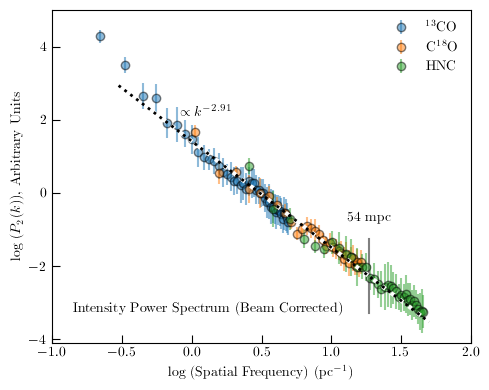

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
plot_powerspectrum(ax, soln_log_hnc.x, do_hnc=True)

text_pspec = 'Intensity Power Spectrum (Beam Corrected)'
ax.text(0.05, 0.09, text_pspec, horizontalalignment='left', transform=ax.transAxes)
ax.set_ylim(-4.1, 5)

fig.savefig('figs/NGC1333_Intensity_Power_Spectrum_Arb_fit_HNC_log.pdf', bbox_inches='tight')

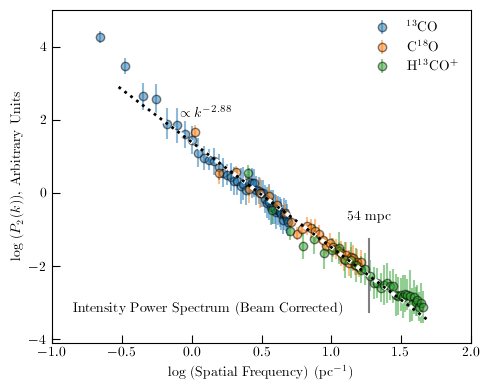

In [20]:
fig, ax = plt.subplots(figsize=(5, 4))
plot_powerspectrum(ax, soln_log_h13cop.x, do_hnc=False)

text_pspec = 'Intensity Power Spectrum (Beam Corrected)'
ax.text(0.05, 0.09, text_pspec, horizontalalignment='left', transform=ax.transAxes)
ax.set_ylim(-4.1, 5)

fig.savefig('figs/NGC1333_Intensity_Power_Spectrum_Arb_fit_H13COp_log.pdf', bbox_inches='tight')

#### Add comparison between Ions and Neutrals at the smallest scales

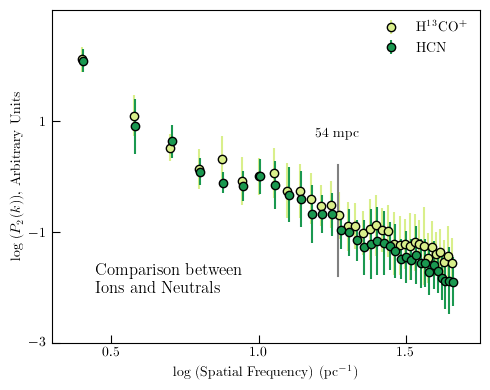

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))

# Normalisation of the power spectra
idx = np.abs(log_freq_h13cop_TdV - 1).argmin()
rescale_ion = log_P_TdV_h13cop[idx]

idx = np.abs(log_freq_hnc_TdV - 1).argmin()
rescale_neutral = log_P_TdV_hnc[idx]

color_HCOp = '#d9ef8b'
color_HNC = '#1a9850'

ax.errorbar(log_freq_h13cop_TdV, log_P_TdV_h13cop - rescale_ion, yerr=elogP_TdV_h13cop, 
            markeredgecolor='k', label='H$^{13}$CO$^+$', fmt="o", 
            ecolor=color_HCOp, markerfacecolor=color_HCOp)
ax.errorbar(log_freq_hnc_TdV, log_P_TdV_hnc - rescale_neutral, yerr=elogP_TdV_hnc, 
            markeredgecolor='k', label='HCN', fmt="o", 
            ecolor=color_HNC, markerfacecolor=color_HNC)

y_k_mhd = -0.8
ax.plot([log_k_mhd_wave, log_k_mhd_wave], y_k_mhd + np.array([-1, 1]), color='gray')
ax.text(log_k_mhd_wave, y_k_mhd + 1.5, '54 mpc', horizontalalignment='center')

plt.legend(frameon=False)

text_pspec = 'Comparison between\n Ions and Neutrals'
ax.text(0.1, 0.15, text_pspec, horizontalalignment='left', transform=ax.transAxes, size=12)

ax.set_xlabel(r'log (Spatial Frequency) (pc$^{-1}$)')
ax.set_ylabel(r'log ($P_2(k)$), Arbitrary Units')
ax.set_xlim(0.3, 1.75)
ax.set_ylim(-3, 3)

ax.xaxis.set_ticks(np.arange(0.5, 1.8, 0.5))
ax.yaxis.set_ticks(np.arange(-3, 3, 2))

plt.tight_layout()

fig.savefig('figs/NGC1333_Intensity_Power_Spectrum_Arb_compare_Ion_Neutral.pdf', bbox_inches='tight')

## EMCEE power-law fit
### Intensity for H$^{13}$CO$^+$

In [22]:
pos = soln_log_h13cop.x + 1e-4 * np.random.randn(32, np.size(soln_log_h13cop.x))
nwalkers, ndim = pos.shape

if os.path.isfile(file_EMCEE_HCOp):
    sampler = emcee.backends.HDFBackend(file_EMCEE_HCOp, read_only=True)
else:
    backend = emcee.backends.HDFBackend(file_EMCEE_HCOp)
    backend.reset(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_probability_log_TdV_H13COp, backend=backend
    )
    sampler.run_mcmc(pos, 50000, progress=True);
    # emcee.backends.HDFBackend(file_EMCEE_HCOp, read_only=True)

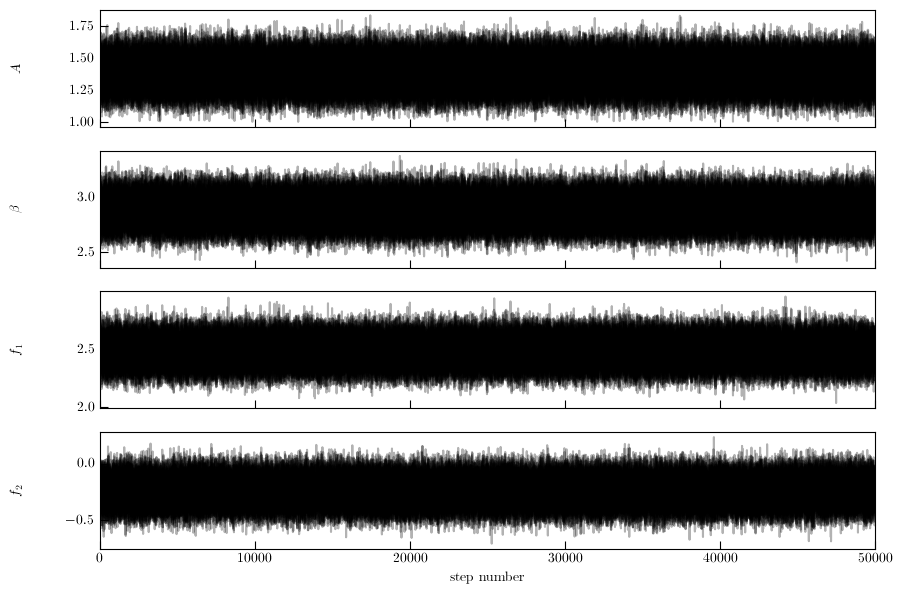

In [23]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = [r"$A$", r"$\beta$", r"$f_1$", r"$f_2$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [24]:
tau = sampler.get_autocorr_time()
print(tau)
flat_samples = sampler.get_chain(discard=300, thin=25, flat=True)

[47.4020295  47.79613609 48.00753164 48.73058497]


'\\mathrm{$A$} = 1.39_{-0.10}^{0.10}'

'\\mathrm{$\\beta$} = 2.88_{-0.11}^{0.11}'

'\\mathrm{$f_1$} = 2.48_{-0.09}^{0.09}'

'\\mathrm{$f_2$} = -0.24_{-0.10}^{0.10}'

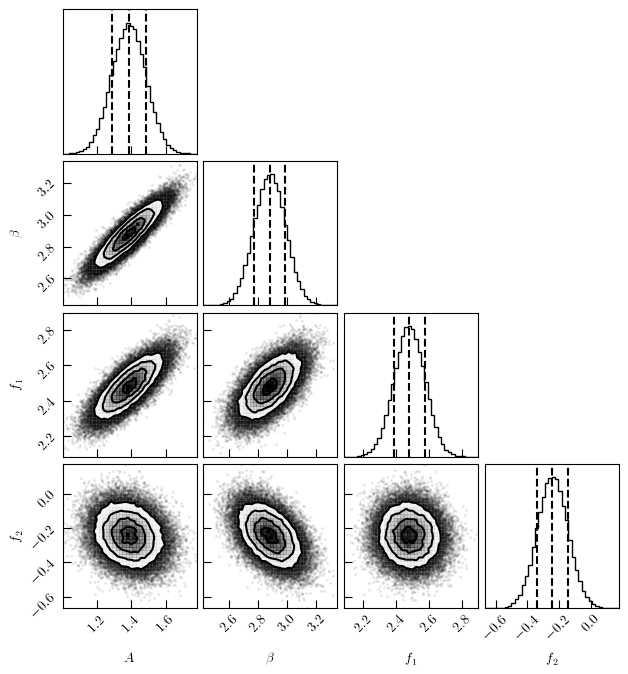

In [25]:
fig_my = plt.figure(figsize=(6.5, 7))

fig = corner.corner(
    flat_samples, 
    labels=labels,
    quantiles=[0.16, 0.5, 0.84],
    show_titles=False,
    bins=40, fig=fig_my, color='k')

soln_log_h13cop_EMCEE = []
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display((txt))
    soln_log_h13cop_EMCEE.append(mcmc[1])
    if i == 1:
        label_beta = r'$\propto k^{'
        label_beta = label_beta + '{0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}'.format(mcmc[1], q[0], q[1]) + '}$'

fig.savefig('figs/EMCEE_corner_H13CO+.pdf')

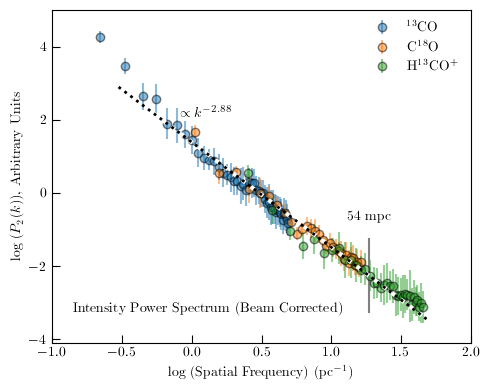

In [26]:
fig, ax = plt.subplots(figsize=(5, 4))
plot_powerspectrum(ax, soln_log_h13cop_EMCEE, do_hnc=False)

ax.set_ylim(-4.1, 5)
text_pspec = 'Intensity Power Spectrum (Beam Corrected)'
ax.text(0.05, 0.09, text_pspec, horizontalalignment='left', transform=ax.transAxes)

fig.savefig('figs/NGC1333_Intensity_Power_Spectrum_Arb_EMCEE_H13COp_log.pdf', bbox_inches='tight')

### Intensity for HNC

In [27]:
pos_log_hnc = soln_log_hnc.x + 1e-4 * np.random.randn(32, np.size(soln_log_hnc.x))
nwalkers_log_hnc, ndim_log_hnc = pos_log_hnc.shape

if os.path.isfile(file_EMCEE_HNC):
    sampler_log_hnc = emcee.backends.HDFBackend(file_EMCEE_HNC, read_only=True)
else:
    backend = emcee.backends.HDFBackend(file_EMCEE_HNC)
    backend.reset(nwalkers, ndim)

    sampler_log_hnc = emcee.EnsembleSampler(
        nwalkers_log_hnc, ndim_log_hnc, log_probability_log_TdV_HNC, backend=backend
    )
    sampler_log_hnc.run_mcmc(pos_log_hnc, 50000, progress=True);

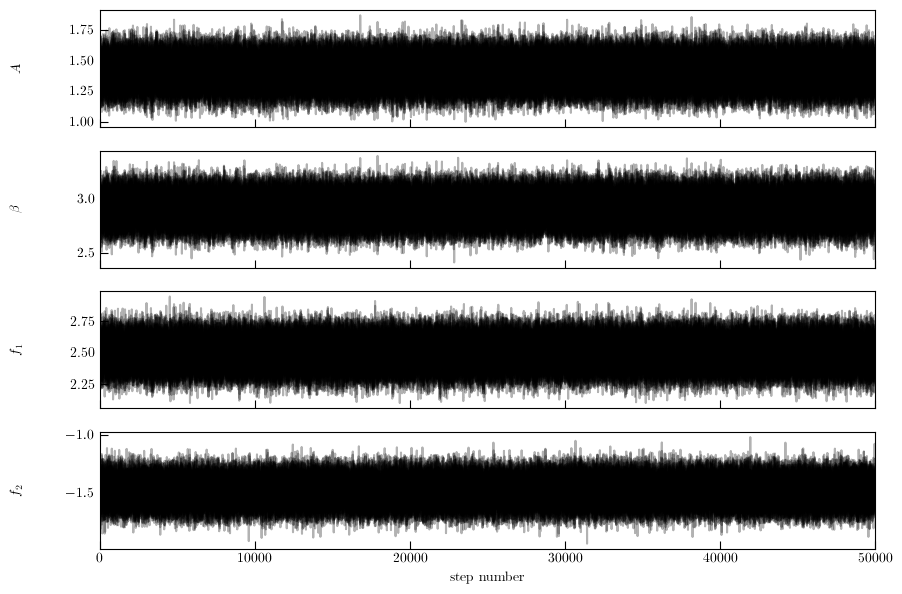

In [28]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples_log_hnc = sampler_log_hnc.get_chain()
labels = [r"$A$", r"$\beta$", r"$f_1$", r"$f_2$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples_log_hnc[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_log_hnc))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [29]:
tau_log_hnc = sampler_log_hnc.get_autocorr_time()
print(tau_log_hnc)
flat_samples_log_hnc = sampler_log_hnc.get_chain(discard=300, thin=25, flat=True)

[46.76850959 47.57694861 45.93721242 48.65455565]


'\\mathrm{$A$} = 1.41_{-0.10}^{0.10}'

'\\mathrm{$\\beta$} = 2.91_{-0.10}^{0.11}'

'\\mathrm{$f_1$} = 2.50_{-0.09}^{0.09}'

'\\mathrm{$f_2$} = -1.48_{-0.09}^{0.09}'

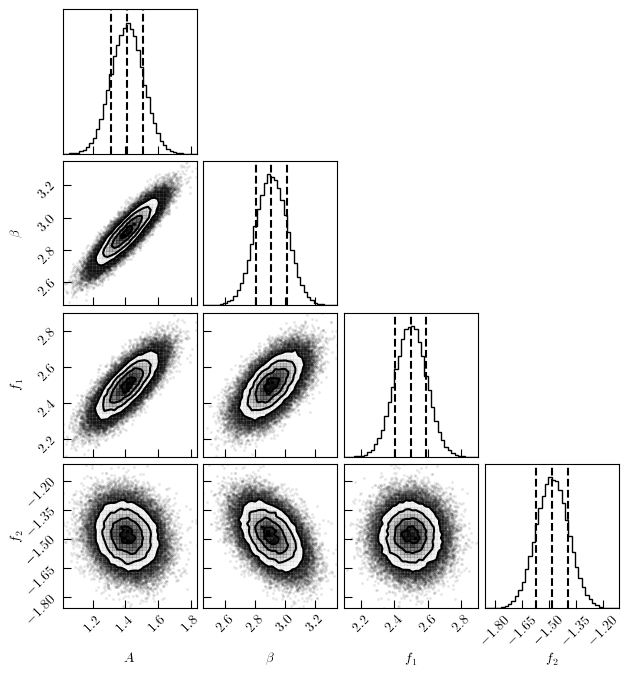

In [30]:
fig_my = plt.figure(figsize=(6.5, 7))

fig = corner.corner(
    flat_samples_log_hnc, 
    labels=labels,
    quantiles=[0.16, 0.5, 0.84],
    show_titles=False,
    bins=40, fig=fig_my, color='k')

soln_log_hnc_EMCEE = []
for i in range(ndim):
    mcmc = np.percentile(flat_samples_log_hnc[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display((txt))
    soln_log_hnc_EMCEE.append(mcmc[1])
    if i == 1:
        label_beta = r'$\propto k^{'
        label_beta = label_beta + '{0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}'.format(mcmc[1], q[0], q[1]) + '}$'

fig.savefig('figs/EMCEE_corner_HNC.pdf')

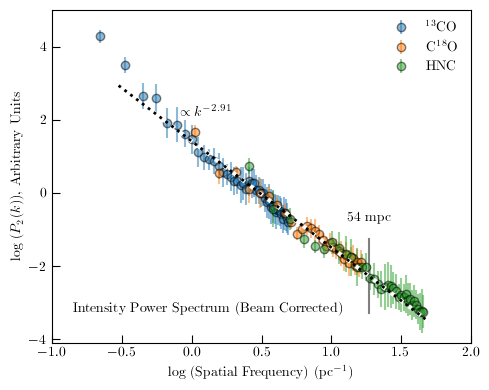

In [31]:
fig, ax = plt.subplots(figsize=(5, 4))
plot_powerspectrum(ax, soln_log_hnc_EMCEE, do_hnc=True)

ax.set_ylim(-4.1, 5)
text_pspec = 'Intensity Power Spectrum (Beam Corrected)'
ax.text(0.05, 0.09, text_pspec, horizontalalignment='left', transform=ax.transAxes)

fig.savefig('figs/NGC1333_Intensity_Power_Spectrum_Arb_EMCEE_HNC_log.pdf', bbox_inches='tight')

Now we export the LaTeX table with the summary of the fits.

In [32]:

soln_log_hnc_EMCEE = []
soln_log_h13cop_EMCEE = []

print("\\begin{tabular}{lcc}")
print("\\hline \hline")
print("Parameter & \ce{H^{13}CO+} & \ce{HNC} \\\\")
print("\\hline")
for i in range(ndim):
    # Create percentiles
    mcmc_h13cop = np.percentile(flat_samples[:, i], [16, 50, 84])
    q_h13cop = np.diff(mcmc_h13cop)

    mcmc_hnc = np.percentile(flat_samples_log_hnc[:, i], [16, 50, 84])
    q_hnc = np.diff(mcmc_hnc)
    
    txt = "{{{3}}} & ${0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}$"
    txt_2 = "${0:.2f}_{{-{1:.2f}}}^{{{2:.2f}}}$"
    
    txt_h13cop = txt.format(mcmc_h13cop[1], q_h13cop[0], q_h13cop[1], labels[i])
    txt_hnc = txt_2.format(mcmc_hnc[1], q_hnc[0], q_hnc[1])
    
    print(txt_h13cop + ' & ' + txt_hnc + '\\\\')
print("\\hline")
print("\\end{tabular}")

\begin{tabular}{lcc}
\hline \hline
Parameter & \ce{H^{13}CO+} & \ce{HNC} \\
\hline
{$A$} & $1.39_{-0.10}^{0.10}$ & $1.41_{-0.10}^{0.10}$\\
{$\beta$} & $2.88_{-0.11}^{0.11}$ & $2.91_{-0.10}^{0.11}$\\
{$f_1$} & $2.48_{-0.09}^{0.09}$ & $2.50_{-0.09}^{0.09}$\\
{$f_2$} & $-0.24_{-0.10}^{0.10}$ & $-1.48_{-0.09}^{0.09}$\\
\hline
\end{tabular}
